# Exploratory Data Analysis on Student's Performance

### Marks secured in reading, writing and math
### AIM: To study the impact of various factors on the performance of students.

Import the libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

Read the data from csv file and display the first 5 records.

In [2]:
data = pd.read_csv('StudentsPerformance.csv')
# To display the top 5 rows
data.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
data.shape #no.of rows and columns in the data frame

(1000, 8)

The size of dataframe is (1000,8) i.e. 1000 rows and 8 columns.

In [4]:
data.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

The datatypes of different featues are shown above.

In [5]:
duplicate_rows = data[data.duplicated()]
print('No. of duplicate rows: ', duplicate_rows.shape)

No. of duplicate rows:  (0, 8)


There are no duplicate entries.

In [6]:
print(data.isnull().sum()) #sum of not null values for each column

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


It can be seen from the above output that there are no null values.

## UNIVARIATE ANALYSIS

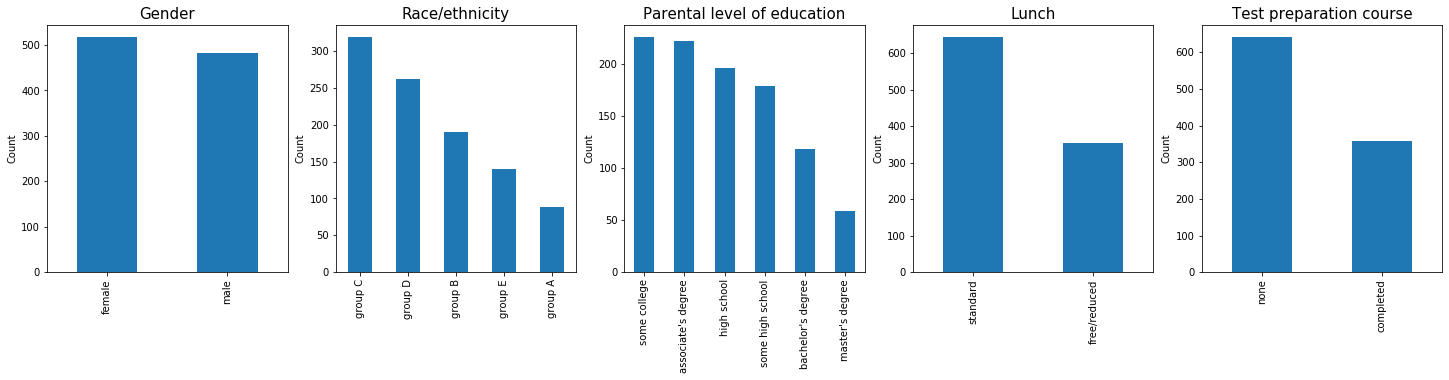

In [7]:
plt.figure(figsize=(25,10))
#plt.subplots_adjust(left=0.125, bottom=1, right=0.9, top=2, wspace=0.5, hspace=0.2)
plt.subplot(2,5,1)
plt.title("Gender",fontsize=15)
plt.ylabel("Count")
data['gender'].value_counts().plot.bar()

plt.subplot(2,5,2)
plt.title("Race/ethnicity",fontsize=15)
plt.ylabel("Count")
data['race/ethnicity'].value_counts().plot.bar()

plt.subplot(2,5,3)
plt.title("Parental level of education",fontsize=15)
plt.ylabel("Count")
plt.xticks(rotation=45)
data['parental level of education'].value_counts().plot.bar()

plt.subplot(2,5,4)
plt.title("Lunch",fontsize=15)
plt.ylabel("Count")
data['lunch'].value_counts().plot.bar()

plt.subplot(2,5,5)
plt.title("Test preparation course",fontsize=15)
plt.ylabel("Count")
data['test preparation course'].value_counts().plot.bar()

The following information can be inferred from the above graphs:

1) There are more females than males.

2) The maximum students belong to group C(more than 300) followed by groups D,B,E and A.

3) The students with their parents having masters degree are the least. Maximum parents have graduated from some college. 

4) Over 300 people have free/reduced lunch whereas most of them have standard. 

5) Majority of the students have not taken/completed any preparation course.

In [8]:
print("Q1 : 25 percentile")
Q1 = data.quantile(0.25)
print(Q1)
print("Q2 : Median")
Q2 = data.quantile(0.5)
print(Q2)
print("Q3 : 75 percentile")
Q3 = data.quantile(0.75)
print(Q3)
print("IQR : difference between 75th and 25th percentile")
IQR = Q3 - Q1
print(IQR)

Q1 : 25 percentile
math score       57.00
reading score    59.00
writing score    57.75
Name: 0.25, dtype: float64
Q2 : Median
math score       66.0
reading score    70.0
writing score    69.0
Name: 0.5, dtype: float64
Q3 : 75 percentile
math score       77.0
reading score    79.0
writing score    79.0
Name: 0.75, dtype: float64
IQR : difference between 75th and 25th percentile
math score       20.00
reading score    20.00
writing score    21.25
dtype: float64


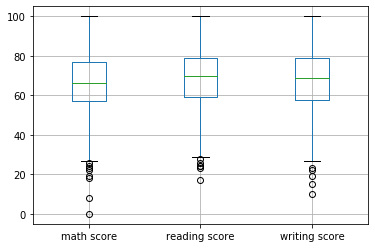

In [9]:
data.boxplot(column=['math score','reading score','writing score'])

There are no anomalies in the data as there is no score less than 0 or greater than 100(total marks).
However, the plot shows that there are some scores, exceptionally low compared to other scores.

In [10]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


The table shows the summary of the data.

From a total of 1000 records, Maths has the least mean of scores and the least minimum score. The mean in two subjects are almost the same. Every subject has a student who has scored full marks.

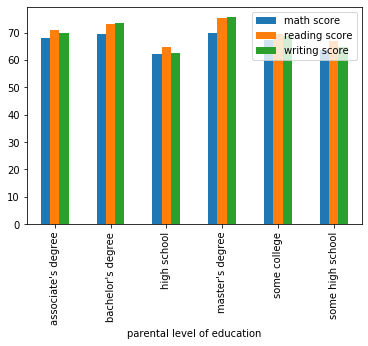

In [11]:
data.groupby('parental level of education').mean().plot.bar()

The mean of the subject score is greater in case of higher qualification of parents. In general, it can be concluded from the graph that Students with parents educated only till high school have less marks as compared to those whose parents have higher degree.
Among the 3 subjects, maths has the least mean irrespective of the parent's degree which means that the students are better in reading and writing skills in comparison to maths if grouped on the basis of parent's level of education.

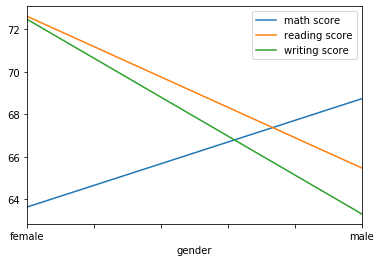

In [12]:
data.groupby('gender').mean().plot.line()

The average maths score of female students is the lowest(compared to male students and the other 2 subjects of females) and their average reading score is highest, almost the same as their reading score.

It means that the males are better in maths compared to females. Also, among the math,reading and writing, male students are better in maths.

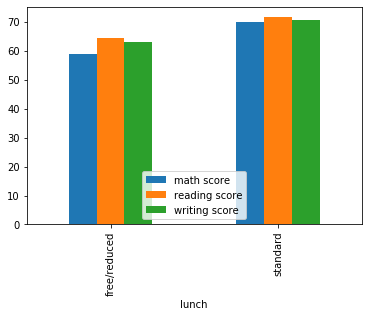

In [13]:
data.groupby('lunch').mean().plot.bar()

Between free and standard lunch, students with standard lunch are better in all 3 subjects.
Students with free/reduced lunch are also poor in maths compared to their reading and writing average scores.
The average score in all 3 subjects is almost the same for people with standard lunch.

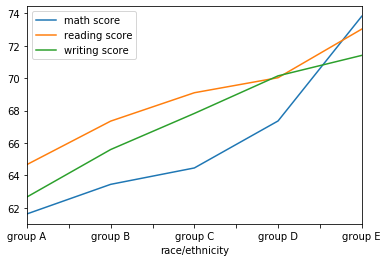

In [14]:
data.groupby('race/ethnicity').mean().plot.line()

Group E students are better in math,reading and writing followed by groups D,C,B and A.

Among the 3 average scores, students of all groups have more average in reading except group E whose maths mean is highest. 

The writing average is between reading and maths in groups A,B and C. In group D, it is same as that of reading and it's lowest in group E.

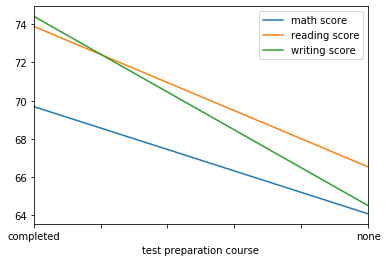

In [15]:
data.groupby('test preparation course').mean().plot.line()

It can be seen clearly that students who have completed the test preparation course have performed better.

## BIVARIATE ANALYSIS

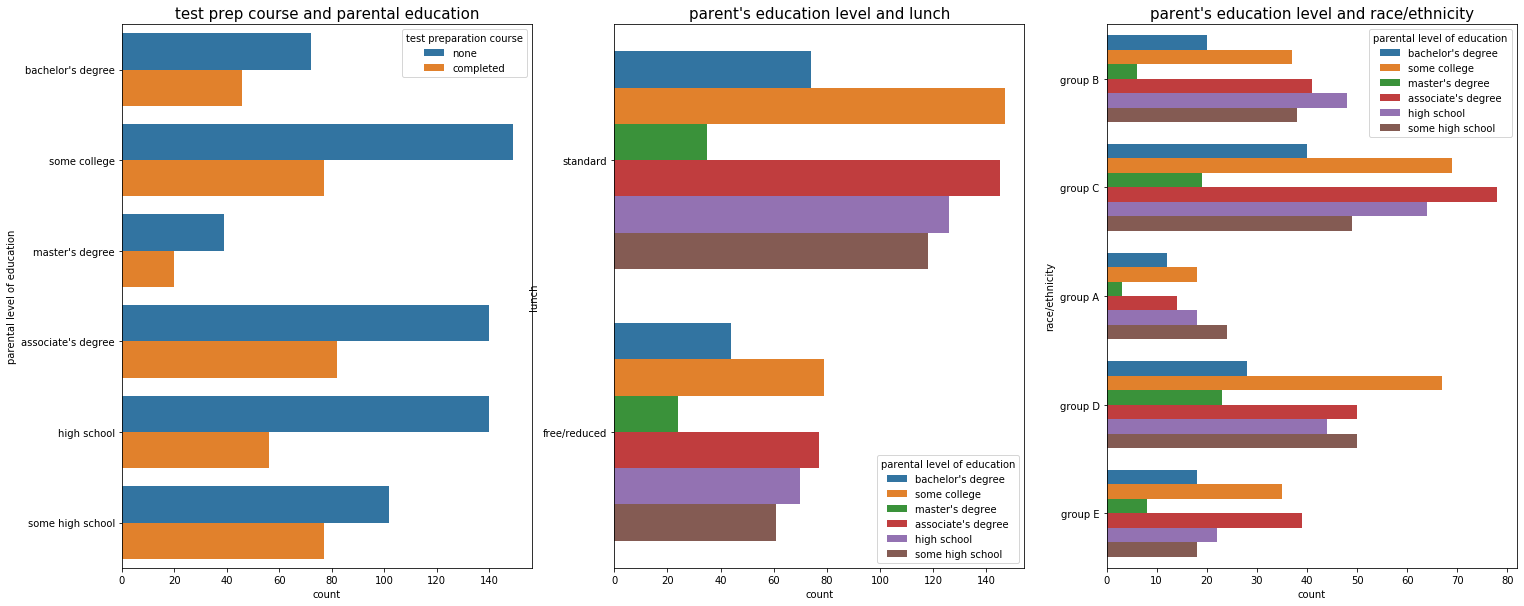

In [3]:
plt.figure(figsize=(25,10))
plt.subplot(131)
plt.title('test prep course and parental education',fontsize = 15)
sns.countplot(y='parental level of education', hue='test preparation course',data=data)
plt.subplot(132)
plt.title('parent\'s education level and lunch',fontsize = 15)
sns.countplot(y='lunch', hue='parental level of education',data=data)
plt.subplot(133)
plt.title('parent\'s education level and race/ethnicity',fontsize = 15)
sns.countplot(y='race/ethnicity', hue='parental level of education',data=data)

1) The first graph suggests the relationship between parent's education and test preparation course. Most of the students who's parental level of education is some college, associate's degree, and high school have completed the test preparation course. 

2) The second graph is lunch vs parental education. 

3) The graph of 'Race/ethnicity vs Parent's education' indicates that maximum group C students have their parents qualification associate degree followed by parents of some college. 

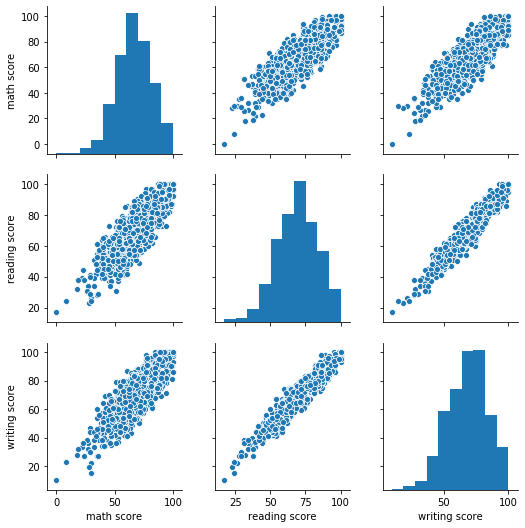

In [17]:
sns.pairplot(data)

It can be inferred that the student who scores good in reading also scores good in other 2 subjects and vice versa since there is a positive correlation between all 3 scores.


Now, converting certain categorical variables to numerical variables for further analysis.

In [18]:
data['gender_male'] = data.gender.map({'female':0, 'male':1})
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,gender_male
0,female,group B,bachelor's degree,standard,none,72,72,74,0
1,female,group C,some college,standard,completed,69,90,88,0
2,female,group B,master's degree,standard,none,90,95,93,0
3,male,group A,associate's degree,free/reduced,none,47,57,44,1
4,male,group C,some college,standard,none,76,78,75,1


In [19]:
data['lunch_standard'] = data.lunch.map({'standard':1, 'free/reduced':0})
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,gender_male,lunch_standard
0,female,group B,bachelor's degree,standard,none,72,72,74,0,1
1,female,group C,some college,standard,completed,69,90,88,0,1
2,female,group B,master's degree,standard,none,90,95,93,0,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,1,0
4,male,group C,some college,standard,none,76,78,75,1,1


In [20]:
data['test_prep_course_completed'] = data['test preparation course'].map({'completed':1, 'none':0})
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,gender_male,lunch_standard,test_prep_course_completed
0,female,group B,bachelor's degree,standard,none,72,72,74,0,1,0
1,female,group C,some college,standard,completed,69,90,88,0,1,1
2,female,group B,master's degree,standard,none,90,95,93,0,1,0
3,male,group A,associate's degree,free/reduced,none,47,57,44,1,0,0
4,male,group C,some college,standard,none,76,78,75,1,1,0


In [21]:
data['race_numerical'] = data['race/ethnicity'].map({'group A':1, 'group B':2,'group C':3,'group D':4,'group E':5})
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,gender_male,lunch_standard,test_prep_course_completed,race_numerical
0,female,group B,bachelor's degree,standard,none,72,72,74,0,1,0,2
1,female,group C,some college,standard,completed,69,90,88,0,1,1,3
2,female,group B,master's degree,standard,none,90,95,93,0,1,0,2
3,male,group A,associate's degree,free/reduced,none,47,57,44,1,0,0,1
4,male,group C,some college,standard,none,76,78,75,1,1,0,3


In [22]:
data['parent_edu_numerical'] = data['parental level of education'].map({'high school':1, 'some high school':2,'bachelor\'s degree':3,'some college':4,'associate\'s degree':5,'master\'s degree':6})
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,gender_male,lunch_standard,test_prep_course_completed,race_numerical,parent_edu_numerical
0,female,group B,bachelor's degree,standard,none,72,72,74,0,1,0,2,3
1,female,group C,some college,standard,completed,69,90,88,0,1,1,3,4
2,female,group B,master's degree,standard,none,90,95,93,0,1,0,2,6
3,male,group A,associate's degree,free/reduced,none,47,57,44,1,0,0,1,5
4,male,group C,some college,standard,none,76,78,75,1,1,0,3,4


In [23]:
data.corr()

,math score,reading score,writing score,gender_male,lunch_standard,test_prep_course_completed,race_numerical,parent_edu_numerical
math score,1.000000,0.817580,0.802642,0.167982,0.350877,0.177702,0.216415,0.153076
reading score,0.817580,1.000000,0.954598,-0.244313,0.229560,0.241780,0.145253,0.176331
writing score,0.802642,0.954598,1.000000,-0.301225,0.245769,0.312946,0.165691,0.211410
gender_male,0.167982,-0.244313,-0.301225,1.000000,0.021372,0.006028,-0.001502,-0.045319
lunch_standard,0.350877,0.229560,0.245769,0.021372,1.000000,-0.017044,0.046563,-0.007907
test_prep_course_completed,0.177702,0.241780,0.312946,0.006028,-0.017044,1.000000,0.017508,0.017294
race_numerical,0.216415,0.145253,0.165691,-0.001502,0.046563,0.017508,1.000000,0.112466
parent_edu_numerical,0.153076,0.176331,0.211410,-0.045319,-0.007907,0.017294,0.112466,1.000000


The above matrix shows all the possible correlations between numerical variables. 

Negative correlation is a relationship between 2 variables in which as one variable increases, the other decreases and vice versa. A perfect negative correlation is -1, a 0 indicates no correlation, and a +1 indicates a perfect positive correlation.

All of them are positive except some like  'gender=male and writing score' and 'gender=male and reading score'. Interpretation: If gender is 1 ie. male, the reading and writing scores will be less.

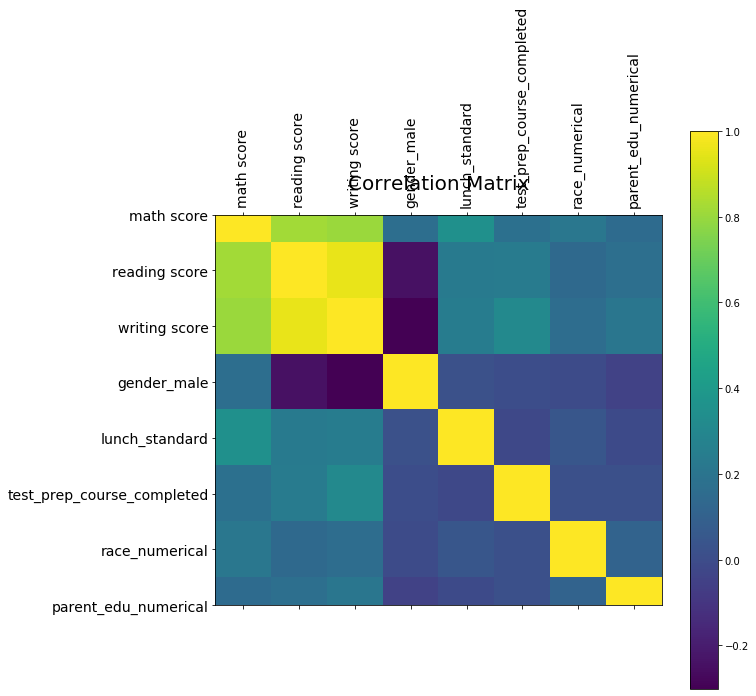

In [24]:
f = plt.figure(figsize=(10, 10))
plt.matshow(data.corr(), fignum=f.number)
plt.xticks(range(len(data.corr().columns)), data.corr().columns,fontsize=14, rotation=90)
plt.yticks(range(len(data.corr().columns)), data.corr().columns,fontsize=14)
plt.colorbar()
plt.title('Correlation Matrix', fontsize=20)
plt.show()

HEATMAP

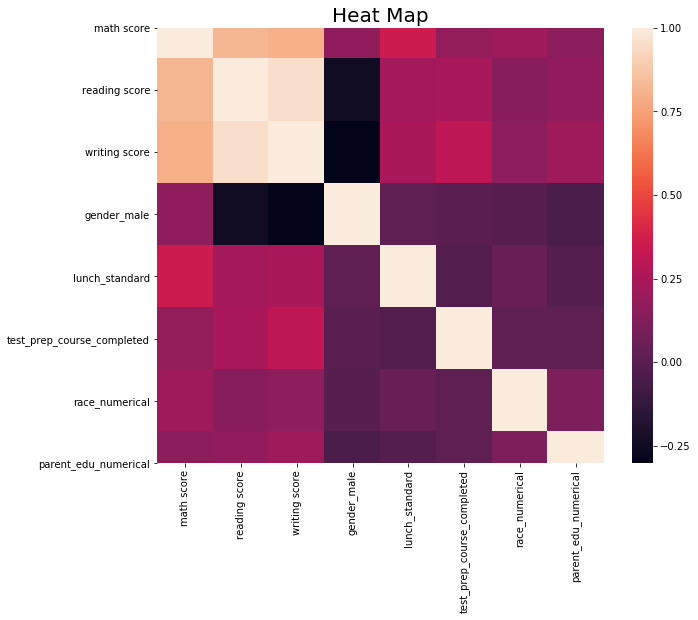

In [25]:
plt.figure(figsize=(10,8))
plt.title('Heat Map', fontsize=20)
sns.heatmap(data.corr())

The correlation graph and heat map shown above indicates the magnitude of correlation matrix using different intensities of colour in 2D.

In [26]:
maths_marks = ['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100']
data['math_grouping'] = pd.cut(data['math score'],range(1,102,10),right=False, labels=maths_marks)
print(data[['math score','math_grouping']].head(5))
reading_marks = ['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100']
data['reading_grouping'] = pd.cut(data['reading score'],range(1,102,10),right=False, labels=maths_marks)
print(data[['reading score','reading_grouping']].head(5))
maths_marks = ['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100']
data['writing_grouping'] = pd.cut(data['writing score'],range(1,102,10),right=False, labels=maths_marks)
print(data[['writing score','writing_grouping']].head(5))

   math score math_grouping
0          72         71-80
1          69         61-70
2          90         81-90
3          47         41-50
4          76         71-80
   reading score reading_grouping
0             72            71-80
1             90            81-90
2             95           91-100
3             57            51-60
4             78            71-80
   writing score writing_grouping
0             74            71-80
1             88            81-90
2             93           91-100
3             44            41-50
4             75            71-80


Text(0.5, 1.0, 'Writing')

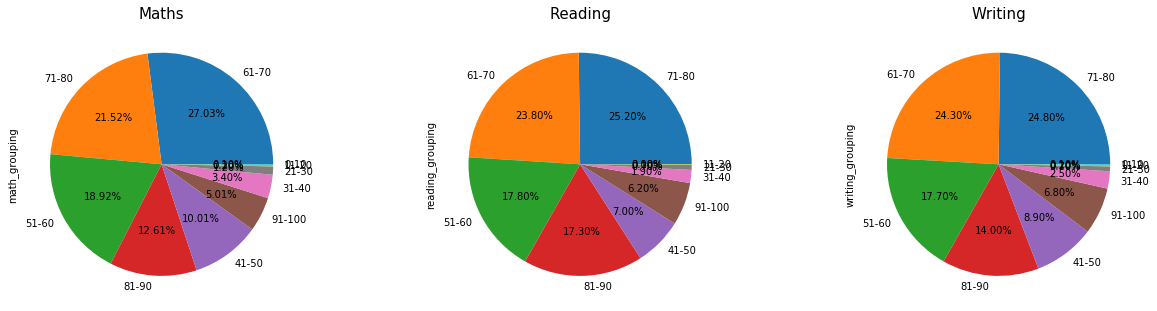

In [27]:
plt.figure(figsize=(20,20))
plt.subplots_adjust(left=0.125, bottom=0.5, right=0.9, top=0.9, wspace=0.5, hspace=0.2)
plt.subplot(131)
data.math_grouping.value_counts().plot.pie(autopct="%0.2f%%")
plt.title("Maths",fontsize=15)
plt.subplot(132)
data.reading_grouping.value_counts().plot.pie(autopct="%0.2f%%")
plt.title("Reading",fontsize=15)
plt.subplot(133)
data.writing_grouping.value_counts().plot.pie(autopct="%0.2f%%")
plt.title("Writing",fontsize=15)

In maths, the maximum scores are from 61-70(27.03%).

The maximum scores in reading are from 71-80(25.20%). A similar trend is also seen in writing scores.

Now, let us see where the concentration of marks is in a given range.

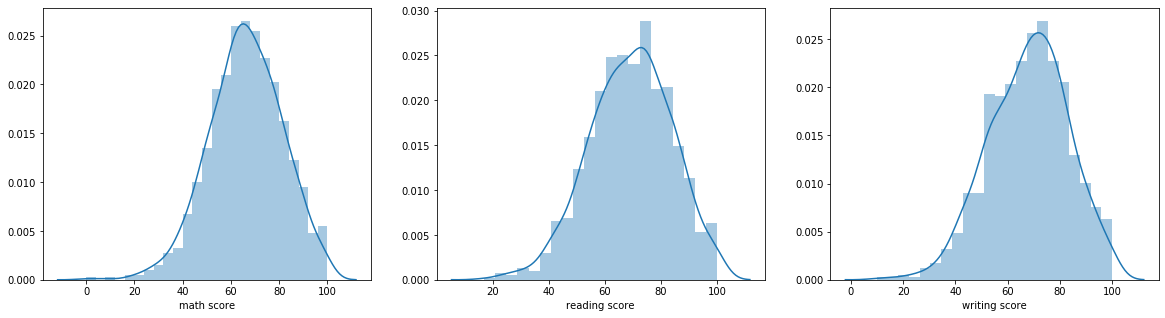

In [28]:
plt.figure(figsize=(20,5))
plt.subplot(131)
sns.distplot(data['math score'])
plt.subplot(132)
sns.distplot(data['reading score'])
plt.subplot(133)
sns.distplot(data['writing score'])

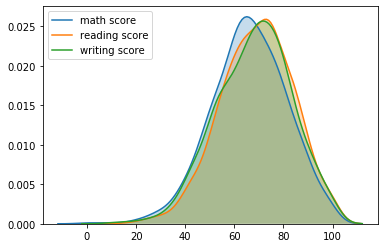

In [29]:
sns.kdeplot(data['math score'],shade=True)
sns.kdeplot(data['reading score'],shade=True)
sns.kdeplot(data['writing score'],shade=True)

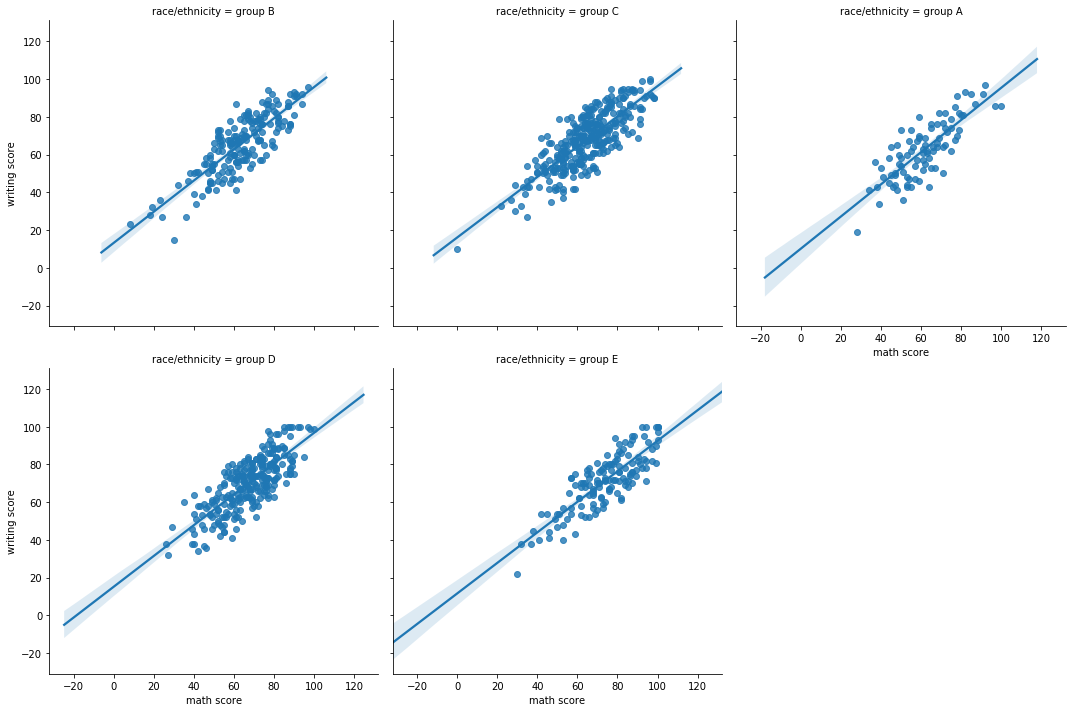

In [30]:
sns.lmplot('math score','writing score',data=data,col='race/ethnicity',col_wrap=3)

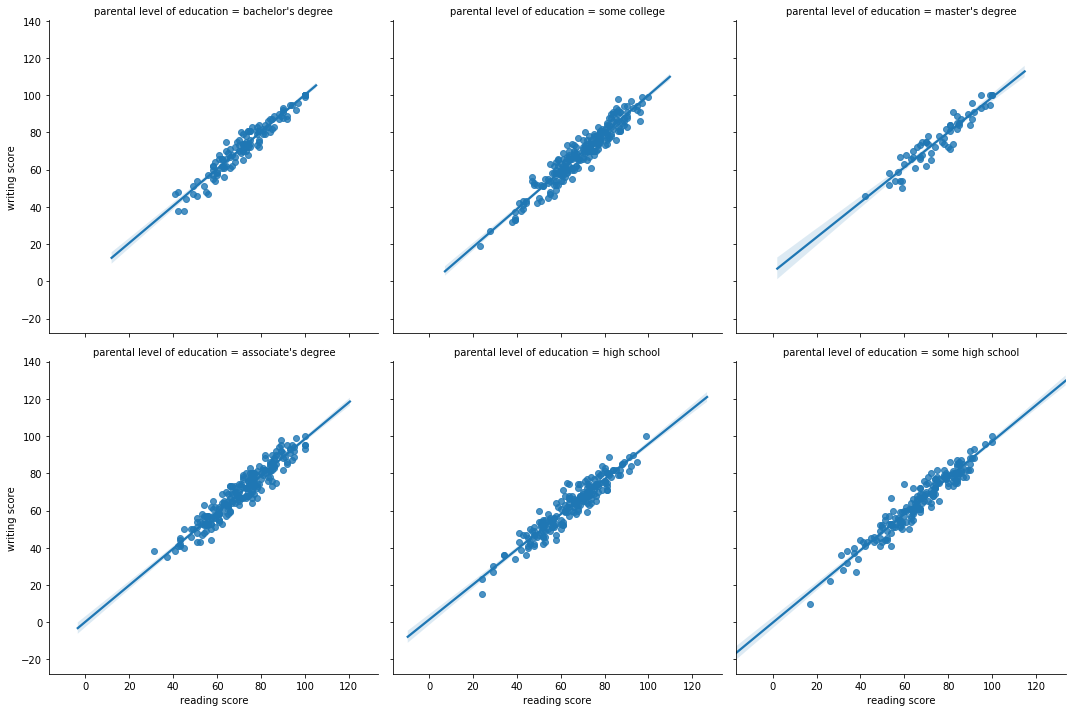

In [31]:
sns.lmplot('reading score','writing score',data=data,col='parental level of education',col_wrap=3)

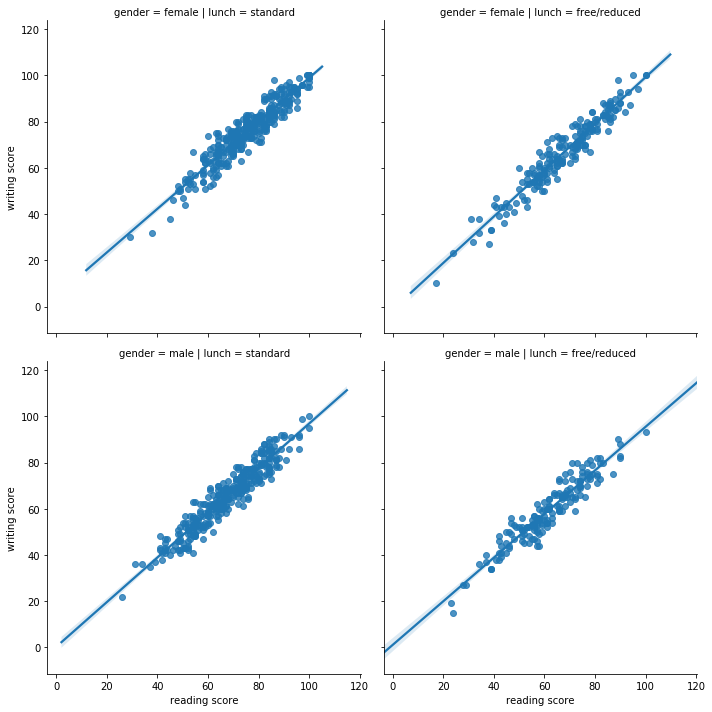

In [32]:
sns.lmplot('reading score','writing score',data=data,row='gender',col='lunch')

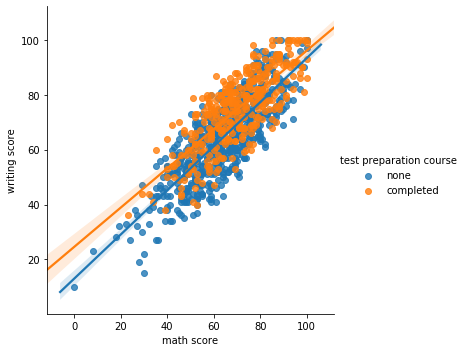

In [33]:
sns.lmplot('math score','writing score',data=data,hue='test preparation course')

All the above lmplots suggest a regression line betweeen different variables to fit the model. The data is good fit for linear regression model with less variance. However, there are a few points in some graphs far away from the line which can be considered as outliers.